Инструментарий:


*   Python
*   NLTK
*   SKLearn
*   Pandas
*   NumPy


# Оценка тематики текста

Будем использовать встроенный датасет fetch_20newsgroups, содержащий
текстовую информацию по различной тематике. Этот датасет размечен и нашей
задачей будет «угадать» категорию по имеющемуся тексту. Применим метод
векторизации и анализ «мешка слов».


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
train = fetch_20newsgroups(
 subset="train",
 categories=['rec.sport.hockey',"sci.space"],
 shuffle=True)
test = fetch_20newsgroups(
 subset="test",
 categories=['rec.sport.hockey',"sci.space"],
 shuffle=True)
target_names = train.target_names
y_train = train.target
y_test = test.target

In [ ]:
# номера классов и их названия
y_train, target_names

(array([0, 0, 1, ..., 1, 0, 1]), ['rec.sport.hockey', 'sci.space'])

In [ ]:
# текст
train.data[5]

'From: cobra@ravel.udel.edu (KING COBRA)\nSubject: Re: NHLPA poll (partial stats/results)\nNntp-Posting-Host: ravel.udel.edu\nOrganization: University of Delaware\nLines: 26\n\nIn article <ofnmaO_00iV1A6kYd2@andrew.cmu.edu> Young-Soo Che <yc25+@andrew.cmu.edu> writes:\n>All these people who send in their polls should take a closer look at\n>NJD, they are a very deep team, with two very capable goalies, and\n>excellent forwards and defensemen.  Shooter in Richer, an all around do\n>it all in Todd, chef Stasny-master of a thousand dishes, power play\n>captain-Stevens.  Take a look at the numbers, or play with them and see\n>for yourselves.\n\n  Yup. I agree with ya. I think Devils can beat Red Wings easily. SO I think\n  all those who send in their votes should try all these diffrent teams\n  before voting. I think Islanders and Quebec are much better then I had\n  expected.\n\n  COBRA\n\n\n\n*******************************************************************************\n**   ___  ____ 

Датасет уже разделен на 2 датасета для обучения и тестирования, которые могут
быть извлечены.
Нашей задачей будет: определить, идет ли в сообщении речь о космосе. Для
ускорения работы извлечены только 2 категории – space и hockey.

Проведем векторизацию с применением метрики tf-idf.


In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")
X_train = vectorizer.fit_transform(train.data)
X_test = vectorizer.transform(test.data)
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# признаки
feature_names

array(['00', '000', '0005', ..., 'zoo', 'zoology', 'zubov'], dtype=object)

In [ ]:
X_train, X_train[:25,:10].todense()

(<1193x5495 sparse matrix of type '<class 'numpy.float64'>'
 	with 108823 stored elements in Compressed Sparse Row format>,
 matrix([[0.08012459, 0.        , 0.        , 0.05248978, 0.        ,
          0.05497913, 0.07086778, 0.0513327 , 0.        , 0.07323688],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.      

In [ ]:
# создадим и обучим классификатор
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
# определим наиболее важные признаки
import numpy as np
import pandas as pd

average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()
top20_indexes=np.argsort(average_feature_effects[0])[-20:]
print(*[(feature_names[i],average_feature_effects[0][i]) for i in top20_indexes],sep='\n')
print('---------------------------------------------')
bottom20_indexes=np.argsort(average_feature_effects[0])[:20]
print(*[(feature_names[i],average_feature_effects[0][i]) for i in bottom20_indexes],sep='\n')

('long', 0.0031084342771679047)
('shuttle', 0.0031994598856997392)
('alaska', 0.003280061513329163)
('org', 0.0033096220201629537)
('things', 0.0036116521527328783)
('pat', 0.0037239204315568613)
('work', 0.0037437303944106797)
('launch', 0.0038521049992707615)
('earth', 0.004050136458632343)
('like', 0.0050594585549279)
('sci', 0.005334468345394218)
('digex', 0.005409380273944602)
('henry', 0.005434838574831867)
('moon', 0.005970896812041205)
('access', 0.006275122386222897)
('gov', 0.006278902947607225)
('orbit', 0.0066292462135633615)
('com', 0.008403974641958096)
('nasa', 0.011273263101585699)
('space', 0.04076697529560144)
---------------------------------------------
('hockey', -0.022395300984119865)
('ca', -0.018671713083316225)
('game', -0.01685462755660917)
('team', -0.016181980242889863)
('university', -0.013213761295023213)
('nhl', -0.011122532994499019)
('play', -0.009649060974914869)
('players', -0.006956974589790331)
('season', -0.006567565439681158)
('games', -0.00582225

In [ ]:
x = vectorizer.transform(['hello from spaceship','goal'])
clf.predict(x)

array([1, 0])

Оценить для модели accuracy. Построить матрицу ошибок (для этого используем ConfusionMatrixDisplay)

In [ ]:
import matplotlib.pyplot as plt

Accuracy for RidgeClassifier: 0.9962168978562421


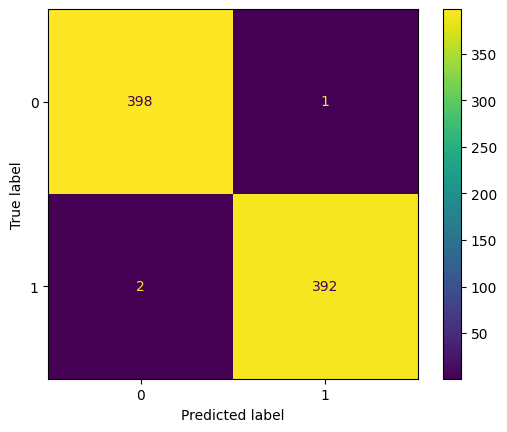

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Обучение модели RidgeClassifier
clf = RidgeClassifier()
clf.fit(X_train, y_train)

# Предсказание меток для тестового набора
pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, pred)
print("Accuracy for RidgeClassifier:", accuracy)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

 Провести с помощью полученной модели оценку 2-3 произвольных текстов на английском языке. Относятся ли они к космосу? (необходимо уже на настроенном объекте vectorizer применить метод transform() к списку проверяемых текстов, а затем на основе полученной разреженной матрицы получить предсказание на классификаторе)

In [ ]:
from sklearn.linear_model import RidgeClassifier
classifier = RidgeClassifier()
classifier.fit(X_train, y_train)

# Тексты для оценки
text1 = "However, the most important event in space exploration took place in on April 12, 1961, when spaceship “Vostok” with a man on board was launched into space. This first man who overcame gravitation was Yuri Gagarin."
text2 = "Drawing comics is not the same as just drawing. When you draw a person, an animal or an object, normally there is no story in it. Comics are all about storytelling"

# Преобразование текстов в векторы признаков
texts_to_evaluate = [text1, text2]
X_eval = vectorizer.transform(texts_to_evaluate)

# Предсказание классификатора
predictions = classifier.predict(X_eval)

# Вывод результатов
for text, prediction in zip(texts_to_evaluate, predictions):
    if prediction == 1:
        print(f"Текст: \"{text}\" относится к космосу.")
    else:
        print(f"Текст: \"{text}\" не относится к космосу.")

Текст: "However, the most important event in space exploration took place in on April 12, 1961, when spaceship “Vostok” with a man on board was launched into space. This first man who overcame gravitation was Yuri Gagarin." не относится к космосу.
Текст: "Drawing comics is not the same as just drawing. When you draw a person, an animal or an object, normally there is no story in it. Comics are all about storytelling" не относится к космосу.


 Изменить датасет, добавив кроме хоккея еще 2-3 новостных группы (например, 'sci.med' и 'comp.graphics'). Как изменились характеристики модели?

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
train = fetch_20newsgroups(
 subset="train",
 categories=['rec.sport.hockey',"sci.space", 'sci.med', 'comp.graphics'],
 shuffle=True)
test = fetch_20newsgroups(
 subset="test",
 categories=['rec.sport.hockey',"sci.space", 'sci.med', 'comp.graphics'],
 shuffle=True)
target_names = train.target_names
y_train = train.target
y_test = test.target

# N-граммы

В некоторых случаях вместо слов есть смысл использовать N-граммы.

N-грамма — это  последовательность из n элементов (слогов, слов или символов), идущих в тексте подряд. Последовательность из двух элементов называют биграмма, из трёх элементов — триграмма.

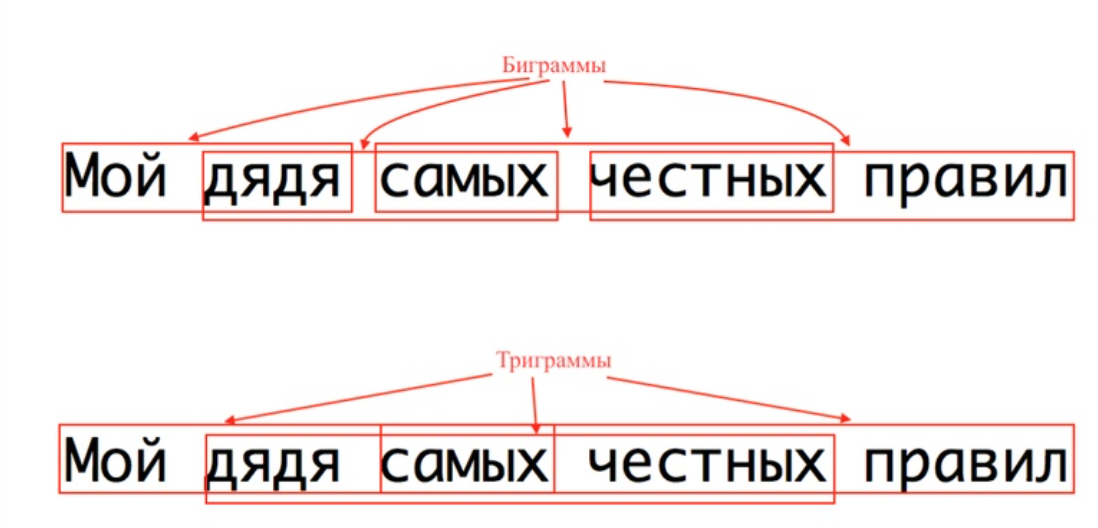

Использование n-грамм позволяет на основе частоты встречаемости пронозировать следующее слово при услвоии появления предшествующего.

In [ ]:
from nltk import ngrams

tokens = ['мама','мыла','раму']
list(ngrams(tokens,2))

[('мама', 'мыла'), ('мыла', 'раму')]

 Сформировать триграммы для произвольного текста, предварительно проведя его токенизацию

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

text = "Иногда под космосом понимали только планетную систему, окружающую Солнце. В современном словоупотреблении в связи с этим остался термин 'космогония', которым обычно обозначают науку о происхождении Солнечной системы, а не всей Вселенной в целом."

tokens = word_tokenize(text)
print(tokens)

['Иногда', 'под', 'космосом', 'понимали', 'только', 'планетную', 'систему', ',', 'окружающую', 'Солнце', '.', 'В', 'современном', 'словоупотреблении', 'в', 'связи', 'с', 'этим', 'остался', 'термин', "'космогония", "'", ',', 'которым', 'обычно', 'обозначают', 'науку', 'о', 'происхождении', 'Солнечной', 'системы', ',', 'а', 'не', 'всей', 'Вселенной', 'в', 'целом', '.']


In [ ]:
from nltk import ngrams

list(ngrams(tokens, 3))

[('мама', 'мыла', 'раму')]

In [ ]:
# Повторим предыдущий пример с биграммами
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english",ngram_range=(2, 2))
X_train = vectorizer.fit_transform(train.data)
X_test = vectorizer.transform(test.data)
feature_names = vectorizer.get_feature_names_out()

In [ ]:
feature_names

array(['00 00', '00 gmt', '00 p003228', ..., 'zoology svr3',
       'zubov andersson', 'zyeh caspian'], dtype=object)

In [ ]:
# создадим и обучим классификатор
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Модель LDA

LDA – Латентное размещение Дирихле (Latent Dirichlet Allocation) — это вероятностная модель, используемая для тематического моделирования при обработке естественного языка. Предполагается, что каждый документ представляет собой смесь тем, а каждая тема — это распределение слов.

Тематическое моделирование применяется, когда у нас есть коллекция документов, мы не знаем, на какие темы там документы, и хотим понять, какие примерно там вообще темы, при этом мы получим не те темы, которые нам понятны, а темы, которые описываются встречающимися в тексте словами.

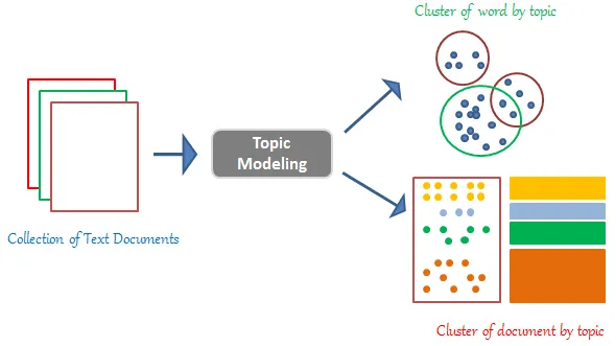

LDA предполагает:

* В документах с похожими темами используются похожие группы слов.
Скрытые темы можно определить через группы слов, которые часто встречаются вместе в документах.
* Документы представляют собой распределения вероятностей по скрытым темам, что означает, что определенный документ будет содержать больше слов по определенной теме.
* Сами темы — это распределение вероятностей по словам.

In [ ]:
# Будем использовать корпус brown из NLTK
from nltk.corpus import brown
import nltk

nltk.download("brown")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
# Формируем мешок слов
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [" ".join(brown.words(file_id)) for file_id in brown.fileids()]

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# осуществляем поиск скрытых тем (предполагаем 7 тем)
lda = LatentDirichletAllocation(n_components=7, topic_word_prior=0.05)
lda.fit(tfidf)

LatentDirichletAllocation(n_components=7, topic_word_prior=0.05)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
# выводим характерные слова для каждой темы
for topic_idx, topic in enumerate(lda.components_):
    print("Тема #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10:-1]]))
    print()

Тема #0:
elections roberts dallas anode greg trevelyan jensen tilghman spencer

Тема #1:
scotty marketing saxon gorton helva eileen banion shorts motors

Тема #2:
said man like time did just mrs old little

Тема #3:
jazz mary musical governor jewish faculty mercer election campaign

Тема #4:
hanover kate platform dartmouth dictionary ruth maris letch wally

Тема #5:
af new state world american states president war year

Тема #6:
jews mike hardy congregation andy alex atlanta wright winston



In [ ]:
#Попробуем определить тематику одного из документов, например, документа с номером 100 в коллекции
print(lda.transform(tfidf[100])[0])


[0.00996138 0.02045169 0.34664426 0.11022134 0.13630187 0.35959919
 0.01682028]


In [ ]:
# это номера 3 наиболее вероятных тем
print(lda.transform(tfidf[100])[0].argsort()[-3:])

[4 2 5]


 Определить тематику произвольного текста на английском языке. Не забываем, что сначала текст нужно векторизовать, вызвав у объекта tfidf_vectorizer метод transform

In [ ]:
text = "Foreign languages often bring new perspectives in career and private life. Many aspects of our Life, like science, entertainment, business, studying became international. Many Russians decide to receive good education, start their career or just spend some time abroad. Upon returning to Russia they are able to share their knowledge, experience and information gained abroad with their colleagues and friends."

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text])

feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_indices = tfidf_matrix.toarray()[0].argsort()[::-1]

top_words = [feature_names[idx] for idx in sorted_indices[:10]]
print(top_words)

['to', 'and', 'their', 'life', 'abroad', 'many', 'career', 'experience', 'international', 'information']
